# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.057559e+01     8.520074e+00
 * time: 0.004830837249755859
     1     2.738930e+01     5.692367e+00
 * time: 0.023802995681762695
     2     2.665287e+01     8.226702e+00
 * time: 0.04811882972717285
     3     2.043177e+01     8.092346e+00
 * time: 0.0732889175415039
     4     1.317693e+01     1.864486e+00
 * time: 0.09980392456054688
     5     1.092705e+01     1.503813e+00
 * time: 0.1852109432220459
     6     1.054709e+01     1.194656e+00
 * time: 0.20264792442321777
     7     1.005973e+01     1.025362e+00
 * time: 0.2191789150238037
     8     9.599706e+00     1.201539e+00
 * time: 0.23643898963928223
     9     9.310484e+00     1.030139e+00
 * time: 0.2548339366912842
    10     9.026303e+00     5.712634e-01
 * time: 0.2718229293823242
    11     8.868836e+00     4.892090e-01
 * time: 0.28801393508911133
    12     8.770590e+00     3.843446e-01
 * time: 0.30431079864501953
    13     8.742102e+00     6.034139e-01
 * time: 0.

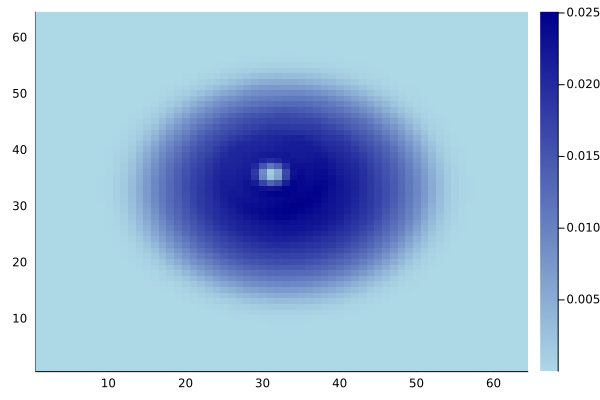

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)